In [51]:
#pip install patool

Note: you may need to restart the kernel to use updated packages.


In [50]:
#!python -m pip show Keras

In [5]:
#Import images and unzip
#import patoolib
#patoolib.extract_archive("archive.zip")

In [80]:
import numpy as np
import seaborn as sns
from tensorflow.keras.preprocessing.image import load_img, img_to_array, ImageDataGenerator
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Dense, Input, Dropout, GlobalAveragePooling2D, Flatten, Conv2D, BatchNormalization, Activation, MaxPooling2D
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.optimizers import Adam
import datetime

from sklearn.metrics import confusion_matrix
import itertools

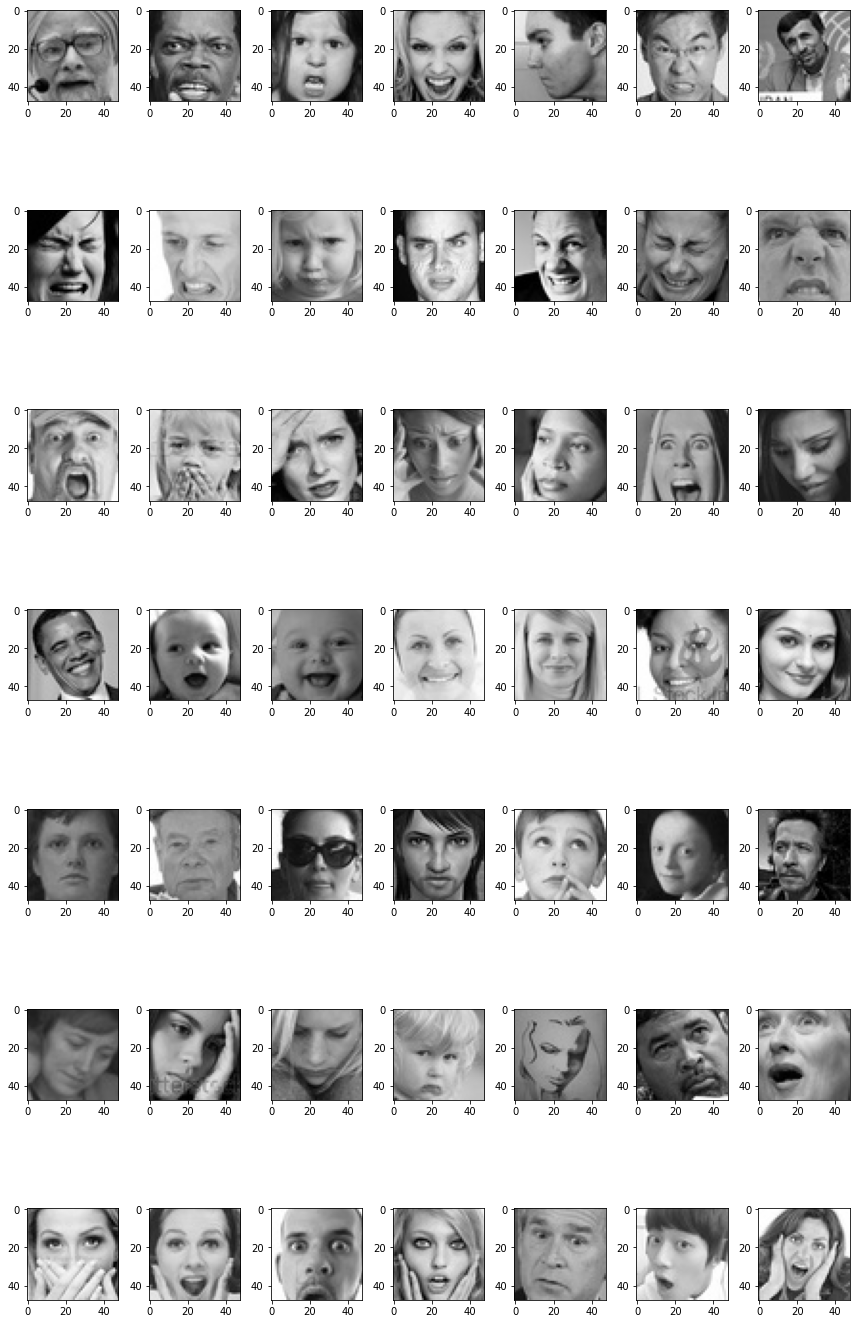

In [67]:
# Image Size LxW
pic_size = 48

PATH = "images/images/"

#Show me your faceS
plt.figure(0, figsize=(12,20))
image_index = 0

for expression in os.listdir(base_path + "train/"):
    for i in range(1,8):
        image_index = image_index + 1
        plt.subplot(7,7,image_index)
        imgage_preview = load_img(PATH + "train/" + expression + "/" +os.listdir(PATH + "train/" + expression)[i], target_size=(pic_size, pic_size))
        plt.imshow(imgage_preview) #cmap="gray")

plt.tight_layout()
plt.show()

In [68]:
#How many images are we talking about?!?
for label in os.listdir(base_path + "train"):
    print(str(len(os.listdir(base_path + "train/" + label))) + " " + label + " images")

3993 angry images
436 disgust images
4103 fear images
7164 happy images
4982 neutral images
4938 sad images
3205 surprise images


In [69]:
batch_size = 128

datagen_train = ImageDataGenerator()
datagen_validation = ImageDataGenerator()

train_generator = datagen_train.flow_from_directory(base_path + "train",
                                                    target_size=(pic_size,pic_size),
                                                    color_mode="grayscale",
                                                    batch_size=batch_size,
                                                    class_mode='categorical',
                                                    shuffle=True)

validation_generator = datagen_validation.flow_from_directory(base_path + "validation",
                                                    target_size=(pic_size,pic_size),
                                                    color_mode="grayscale",
                                                    batch_size=batch_size,
                                                    class_mode='categorical',
                                                    shuffle=False)

Found 28821 images belonging to 7 classes.
Found 7066 images belonging to 7 classes.


In [78]:
class_count = 7

model = Sequential()

# 1 - Convolution
model.add(Conv2D(64,(3,3), padding='same', activation='relu', input_shape=(48, 48,1)))
model.add(BatchNormalization()) 
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

# 2nd Convolution layer
model.add(Conv2D(128,(5,5),padding='same', activation='relu'))
#model.add(BatchNormalization()) 
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

# 3rd Convolution layer
model.add(Conv2D(512,(3,3), padding='same', activation='relu'))
#model.add(BatchNormalization()) 
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

# 4th Convolution layer
model.add(Conv2D(512,(3,3), padding='same', activation='relu'))
#model.add(BatchNormalization()) 
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

# Fully connected layer 1st layer
model.add(Flatten())
model.add(Dense(256))
#model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.25))

# Fully connected layer 2nd layer
model.add(Dense(512))
#model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.25))

model.add(Dense(class_count, activation='softmax'))

opt = Adam(lr=0.0001)
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

C:\Users\gaiag\anaconda3\envs\AIPlayground\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [79]:
%%time

# number of epochs to train the NN
epochs = 48

from keras.callbacks import ModelCheckpoint

checkpoint = ModelCheckpoint("model_weights.h5", monitor='val_acc', verbose=1, save_best_only=True, mode='max')
callbacks_list = [checkpoint]

history = model.fit_generator(generator=train_generator,
                                steps_per_epoch=train_generator.n//train_generator.batch_size,
                                epochs=epochs,
                                validation_data = validation_generator,
                                validation_steps = validation_generator.n//validation_generator.batch_size,
                                callbacks=callbacks_list
                                )

Epoch 1/48


<timed exec>:9: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.


225/225 [==============================] - 210s 930ms/step - loss: 1.8315 - accuracy: 0.2326 - val_loss: 1.7978 - val_accuracy: 0.2920
Epoch 2/48
225/225 [==============================] - 214s 952ms/step - loss: 1.7516 - accuracy: 0.2793 - val_loss: 1.6741 - val_accuracy: 0.3607
Epoch 3/48
225/225 [==============================] - 214s 951ms/step - loss: 1.6334 - accuracy: 0.3541 - val_loss: 1.5282 - val_accuracy: 0.4178
Epoch 4/48
225/225 [==============================] - 220s 977ms/step - loss: 1.5255 - accuracy: 0.4062 - val_loss: 1.4563 - val_accuracy: 0.4538
Epoch 5/48
225/225 [==============================] - 216s 960ms/step - loss: 1.4517 - accuracy: 0.4399 - val_loss: 1.3870 - val_accuracy: 0.4815
Epoch 6/48
225/225 [==============================] - 212s 940ms/step - loss: 1.3937 - accuracy: 0.4665 - val_loss: 1.3266 - val_accuracy: 0.4993
Epoch 7/48
225/225 [==============================] - 214s 949ms/step - loss: 1.3422 - accuracy: 0.4843 - val_loss: 1.2807 - val_accura

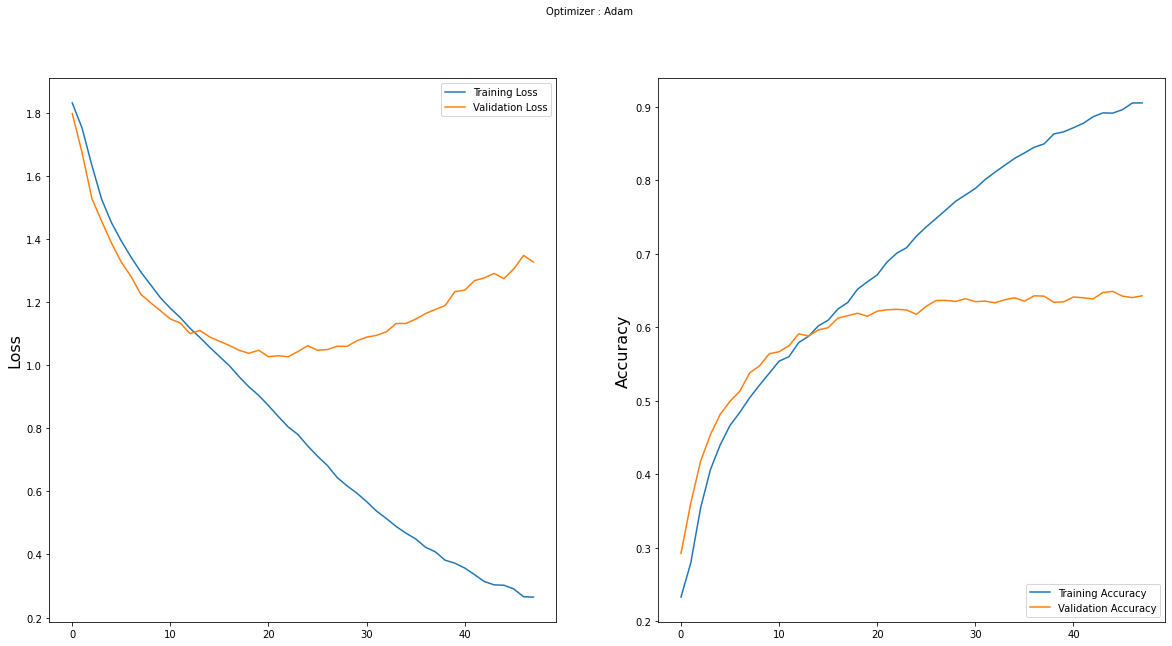

In [81]:
import matplotlib.pyplot as plt

plt.figure(figsize=(20,10))
plt.subplot(1, 2, 1)
plt.suptitle('Optimizer : Adam', fontsize=10)
plt.ylabel('Loss', fontsize=16)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend(loc='upper right')

plt.subplot(1, 2, 2)
plt.ylabel('Accuracy', fontsize=16)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend(loc='lower right')
plt.show()

C:\Users\gaiag\AppData\Local\Temp/ipykernel_24160/4250176596.py:4: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  predictions = model.predict_generator(generator=validation_generator)


<Figure size 432x288 with 0 Axes>

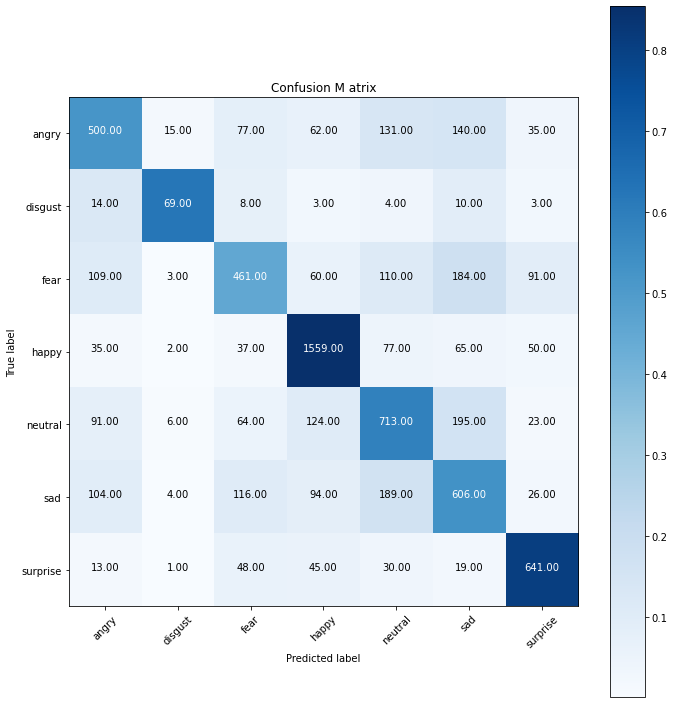

In [82]:
# show the confusion matrix

# compute predictions
predictions = model.predict_generator(generator=validation_generator)
y_predictions = [np.argmax(probas) for probas in predictions]
y_test = validation_generator.classes
class_names = validation_generator.class_indices.keys()

def plot_confusion_matrix(cm, classes, title='Confusion matrix', cmap=plt.cm.Blues):
    confusion_matrix = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    plt.figure(figsize=(10,10))
    plt.imshow(confusion_matrix, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    display_format = '.2f'
    thresh = confusion_matrix.max() / 2.
    for i, j in itertools.product(range(confusion_matrix.shape[0]), range(confusion_matrix.shape[1])):
        plt.text(j, i, format(cm[i, j], display_format),
                 horizontalalignment="center",
                 color="white" if confusion_matrix[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()
    print()
    
# calculate confusion matrix
cnf_matrix = confusion_matrix(y_test, y_predictions)
np.set_printoptions(precision=2)

# show confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names, title='Confusion M atrix')
plt.show()